In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
RESULTS_DIR = os.path.join("..", "results")
DATA_DIR = os.path.join(RESULTS_DIR, "data")
FIGURES_DIR = os.path.join(RESULTS_DIR, "figures")
RESULTS_DIR, DATA_DIR, FIGURES_DIR

('../results', '../results/data', '../results/figures')

In [3]:
HW_all_data = pd.read_csv(os.path.join(DATA_DIR, "HW_all.csv"))

In [4]:
HW_all_data.direction.unique(), HW_all_data.run_id.unique(), HW_all_data.event.unique()

(array(['forward', nan, 'backward', 'right'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([nan, 'obstacle'], dtype=object))

In [5]:
HW_all_data[HW_all_data["event"] == "obstacle"]

,time,direction,event,FrontL,FrontR,FrontC,BackL,BackR,BackC,FrontLL,FrontRR,run_id
19,4.703000,NaN,obstacle,50.0,47.0,83.0,3.0,4.0,7.0,18.0,11.0,0
56,4.223000,NaN,obstacle,43.0,42.0,87.0,3.0,4.0,8.0,10.0,9.0,1
96,4.709000,NaN,obstacle,52.0,48.0,93.0,3.0,4.0,8.0,6.0,24.0,2
133,3.604000,NaN,obstacle,51.0,88.0,179.0,3.0,4.0,8.0,9.0,18.0,3
173,4.693000,NaN,obstacle,217.0,32.0,220.0,3.0,4.0,8.0,106.0,9.0,4
212,4.358000,NaN,obstacle,31.0,43.0,101.0,3.0,4.0,8.0,11.0,10.0,5
252,4.469000,NaN,obstacle,153.0,49.0,82.0,3.0,4.0,8.0,21.0,12.0,6
292,4.814000,NaN,obstacle,59.0,55.0,75.0,3.0,4.0,8.0,18.0,17.0,7
332,4.731000,NaN,obstacle,35.0,28.0,75.0,3.0,4.0,8.0,6.0,32.0,8
369,3.789000,NaN,obstacle,29.0,24.0,61.0,3.0,4.0,8.0,7.0,5.0,9


In [6]:
def plot_sensor_readings(
    data,
    direction,
    run_id,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):
    # Filter the data for the given direction and run_id
    filtered_data = data[(data["direction"] == direction) & (data["run_id"] == run_id)]

    # List of sensor columns

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        plt.plot(filtered_data["time"], filtered_data[sensor], label=sensor)

    plt.xlabel("Time")
    plt.ylabel("Sensor Readings")
    plt.title(
        f"Sensor Readings for {direction.capitalize()} Direction (run_id={run_id})"
    )
    plt.legend()
    plt.show()

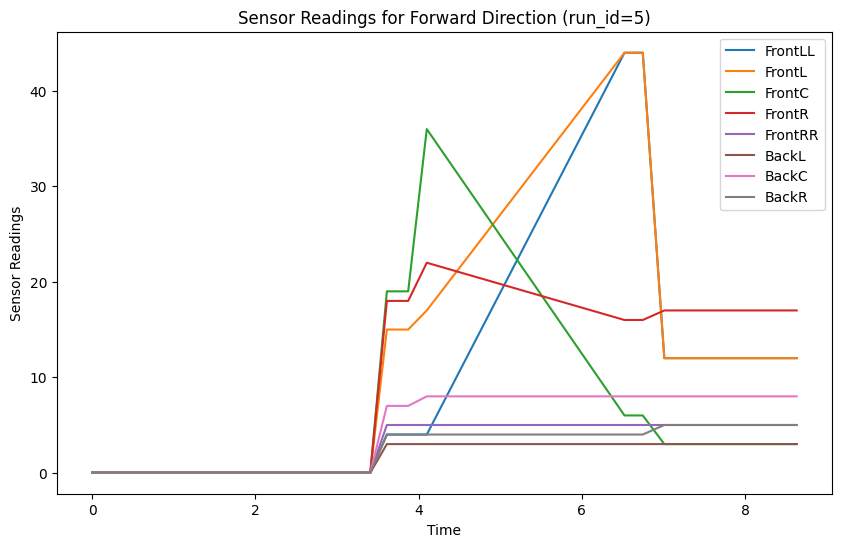

In [7]:
plot_sensor_readings(HW_all_data, "forward", 5)

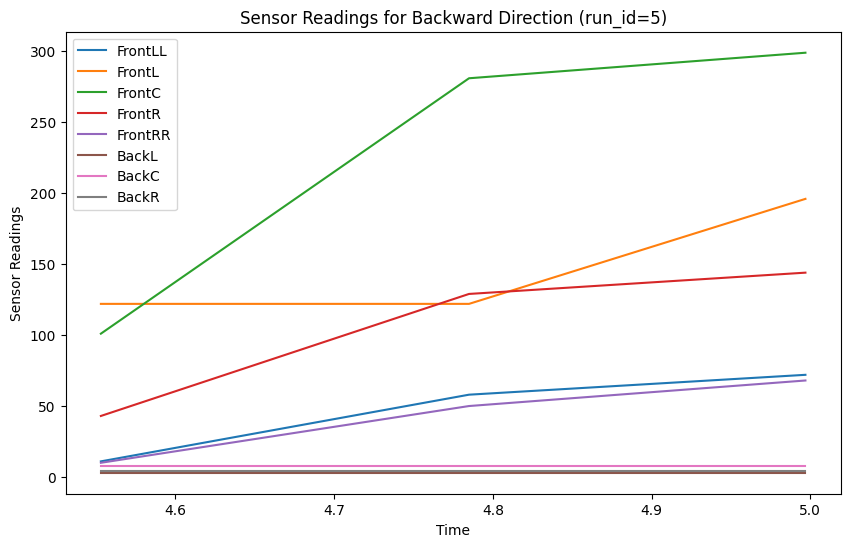

In [8]:
plot_sensor_readings(HW_all_data, "backward", 5)

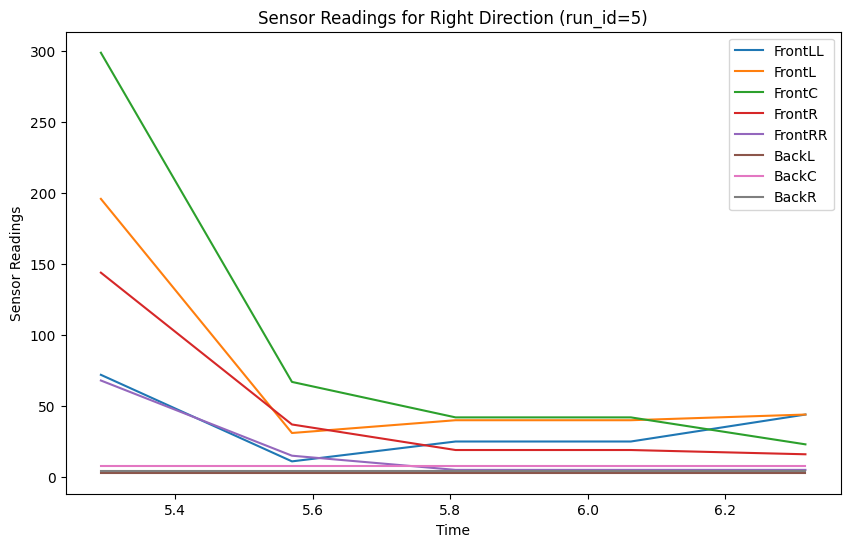

In [9]:
plot_sensor_readings(HW_all_data, "right", 5)

In [10]:
def plot_avg_sensor_readings(
    data,
    direction,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):
    # Filter the data for the given direction
    filtered_data = data[data["direction"] == direction]

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        # Group by time and calculate mean and standard deviation
        grouped = filtered_data.groupby("time")[sensor].agg(["mean", "std"])

        # Plot mean line
        plt.plot(grouped.index, grouped["mean"], label=sensor)

        # Plot shaded area for standard deviation
        plt.fill_between(
            grouped.index,
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.9,
        )

    plt.xlabel("Time")
    plt.ylabel("Average Sensor Readings")
    plt.title(
        f"Average Sensor Readings for {direction.capitalize()} Direction Across All Runs"
    )
    plt.legend()
    plt.show()

In [11]:
FRONT_SENSORS = ["FrontLL", "FrontL", "FrontC", "FrontR", "FrontRR"]
BACK_SENSORS = ["BackL", "BackC", "BackR"]

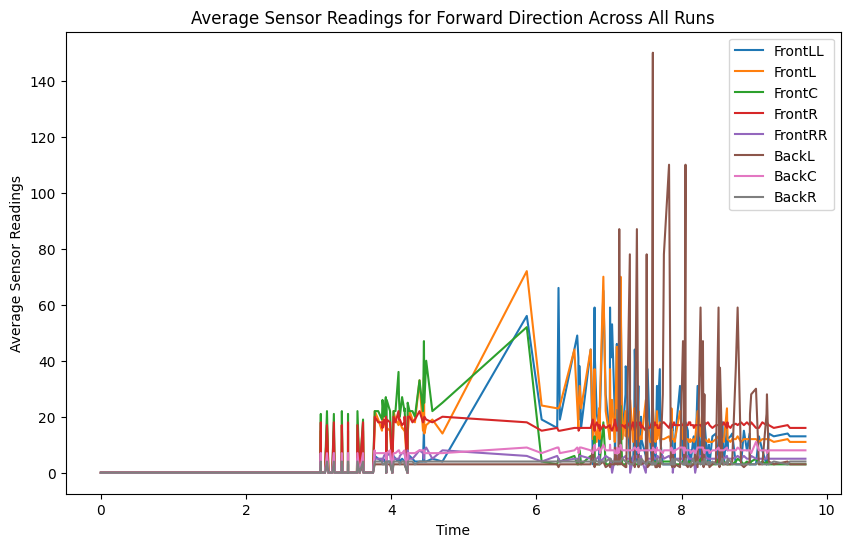

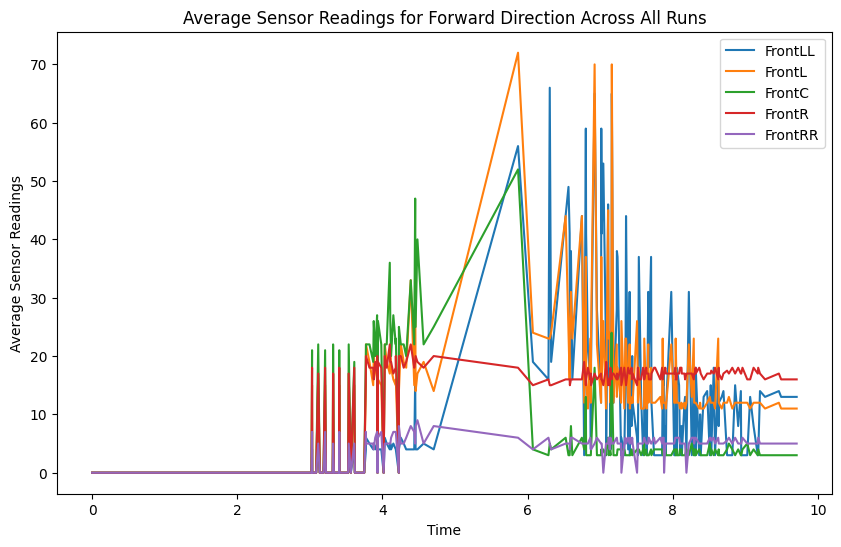

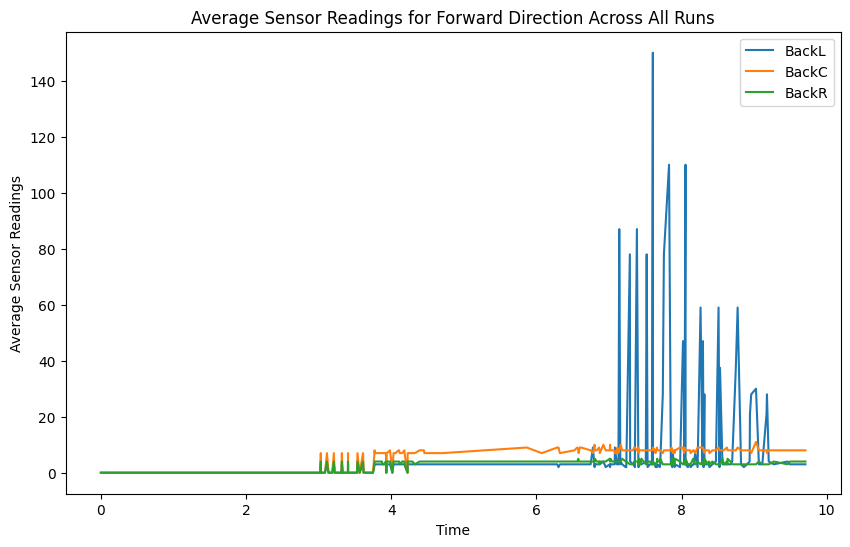

In [12]:
plot_avg_sensor_readings(HW_all_data, "forward"),
plot_avg_sensor_readings(HW_all_data, "forward", FRONT_SENSORS),
plot_avg_sensor_readings(HW_all_data, "forward", BACK_SENSORS)

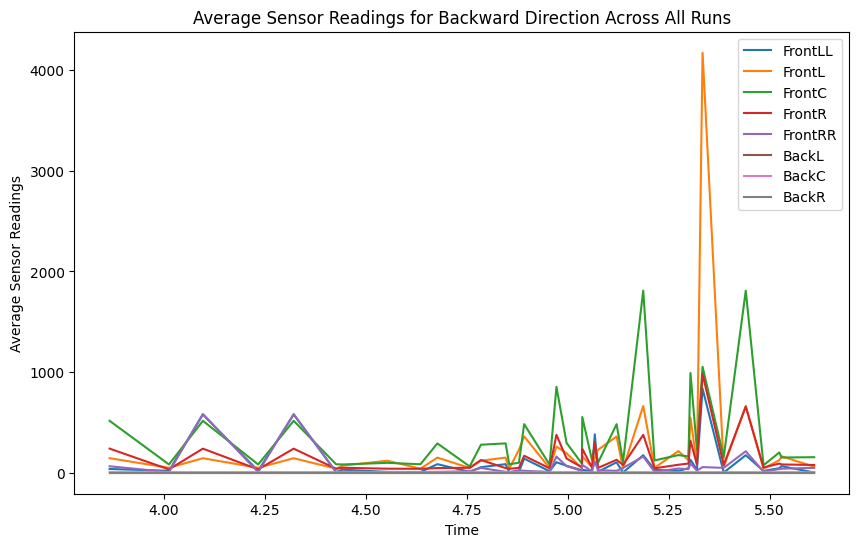

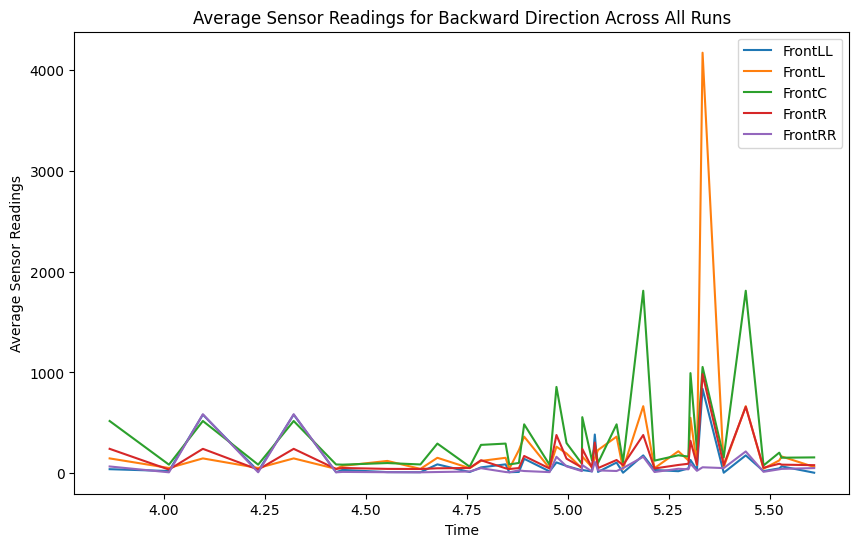

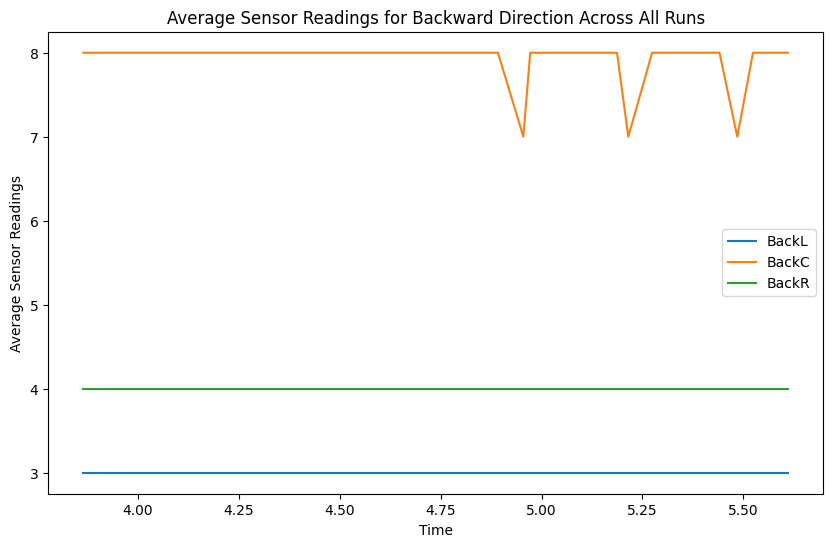

In [13]:
plot_avg_sensor_readings(HW_all_data, "backward"),
plot_avg_sensor_readings(HW_all_data, "backward", FRONT_SENSORS),
plot_avg_sensor_readings(HW_all_data, "backward", BACK_SENSORS)

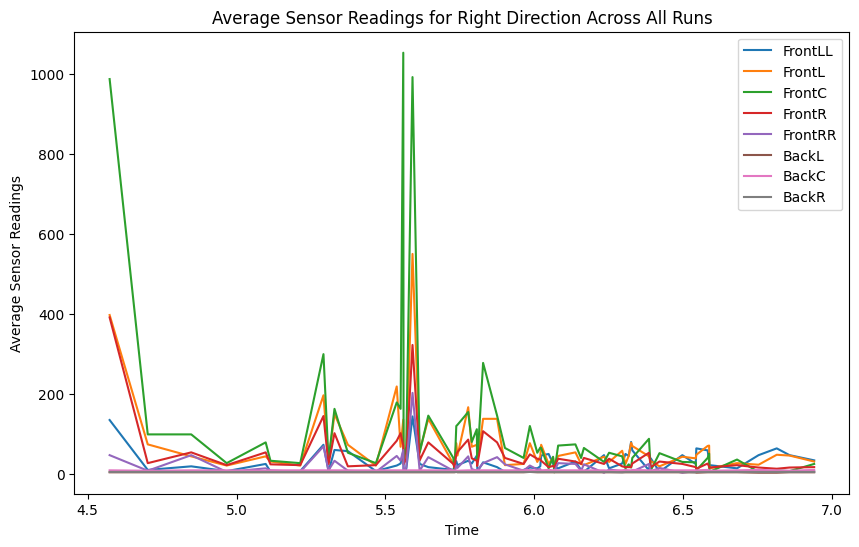

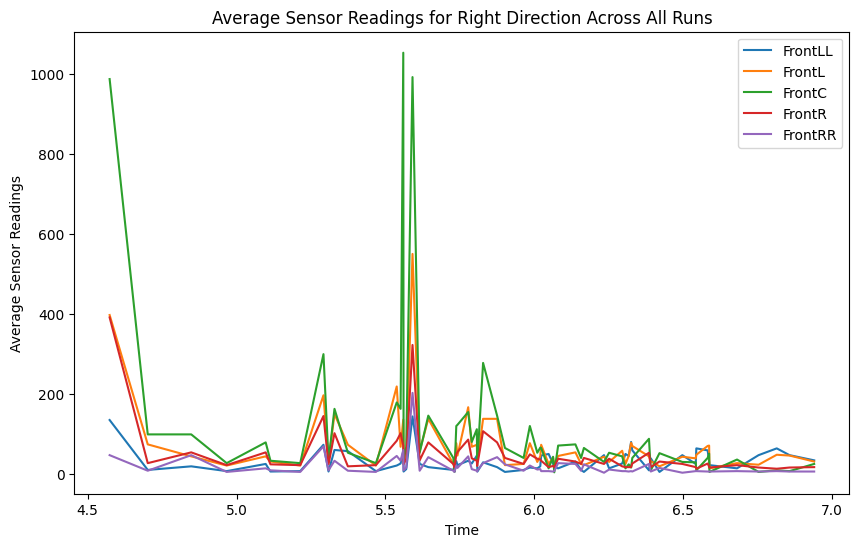

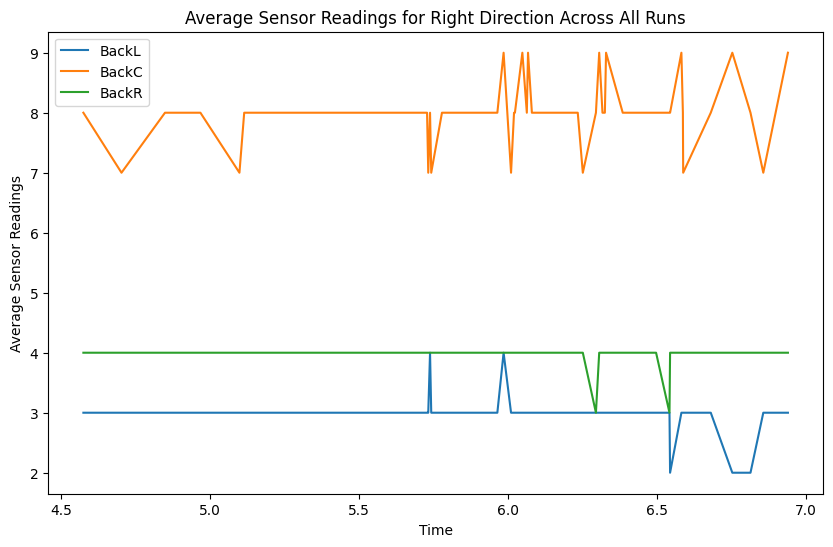

In [14]:
plot_avg_sensor_readings(HW_all_data, "right"),
plot_avg_sensor_readings(HW_all_data, "right", FRONT_SENSORS),
plot_avg_sensor_readings(HW_all_data, "right", BACK_SENSORS)

In [15]:
def plot_avg_sensor_readings_all_runs(
    data,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        # Group by time and calculate mean and standard deviation
        grouped = data.groupby("time")[sensor].agg(["mean", "std"])

        # Plot mean line
        plt.plot(grouped.index, grouped["mean"], label=sensor)

        # Plot shaded area for standard deviation
        plt.fill_between(
            grouped.index,
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.2,
        )

    plt.xlabel("Time")
    plt.ylabel("Average Sensor Readings")
    plt.title("Average Sensor Readings Across All Runs")
    plt.legend()
    plt.show()

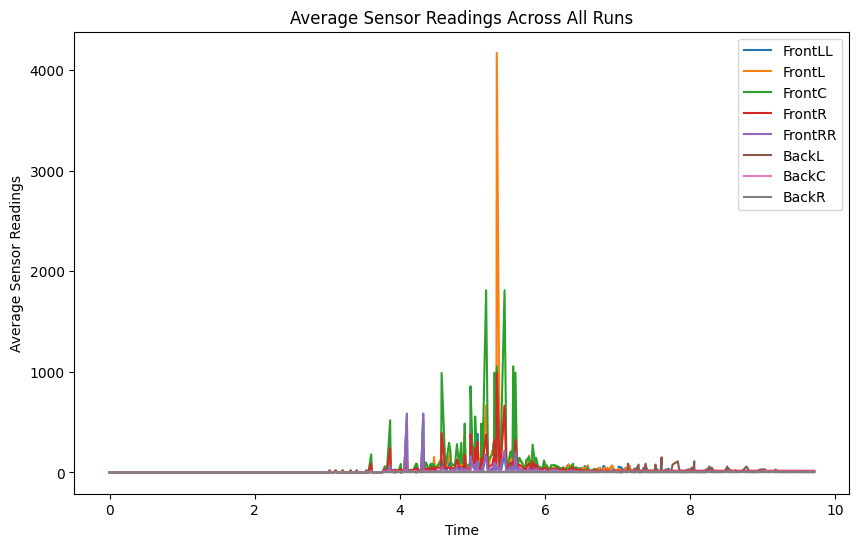

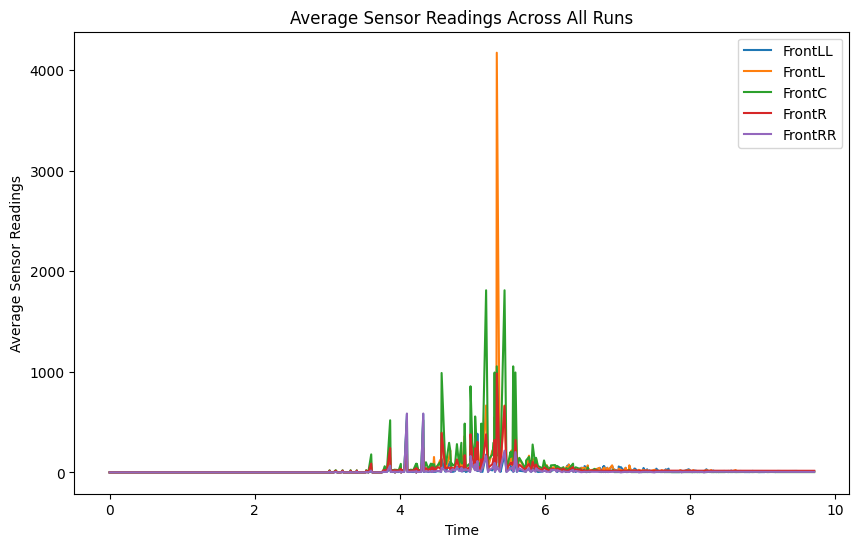

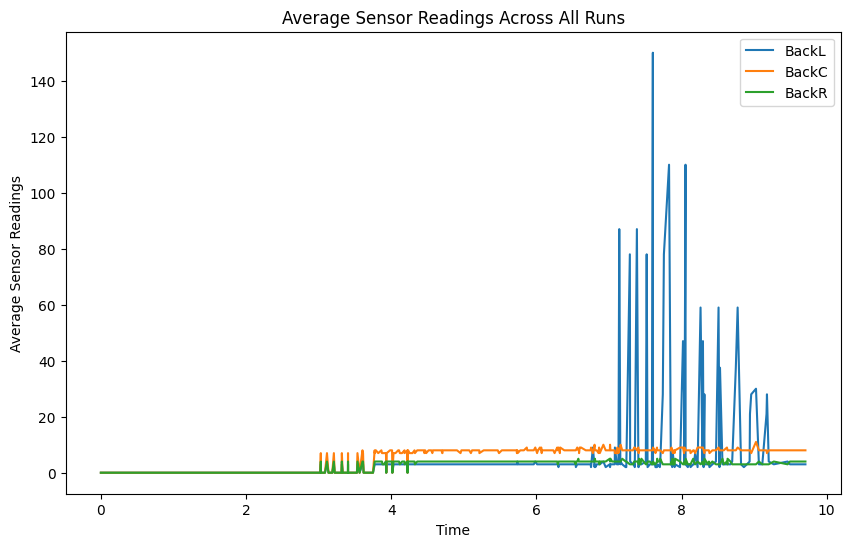

In [16]:
plot_avg_sensor_readings_all_runs(HW_all_data),
plot_avg_sensor_readings_all_runs(HW_all_data, FRONT_SENSORS),
plot_avg_sensor_readings_all_runs(HW_all_data, BACK_SENSORS)

In [17]:
def plot_avg_obstacle_readings(
    data,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):
    # Filter the data for the 'obstacle' event
    filtered_data = data[data["event"] == "obstacle"]

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        # Group by time and calculate mean and standard deviation
        grouped = filtered_data.groupby("time")[sensor].agg(["mean", "std"])

        # Plot mean line
        plt.plot(grouped.index, grouped["mean"], label=sensor)

        # Plot shaded area for standard deviation
        plt.fill_between(
            grouped.index,
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.2,
        )

    plt.xlabel("Time")
    plt.ylabel("Average Sensor Readings")
    plt.title("Average Sensor Readings for 'Obstacle' Events Across All Runs")
    plt.legend()
    plt.show()

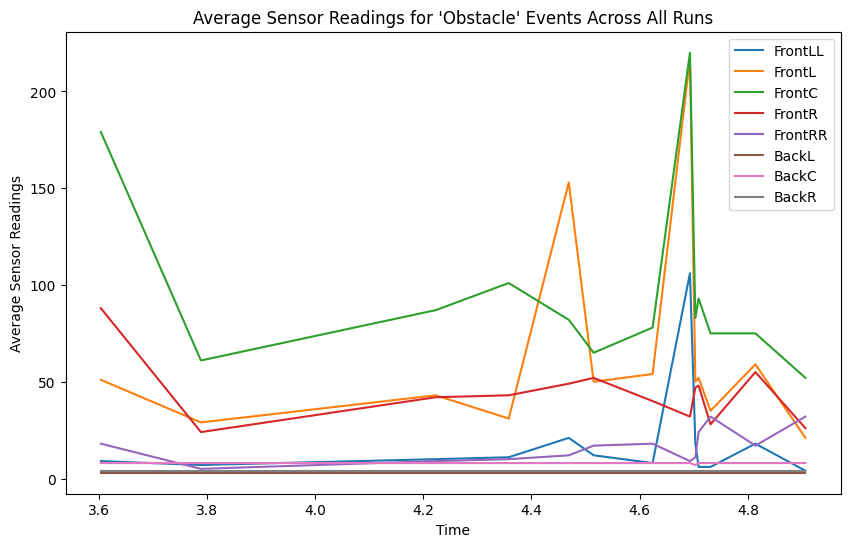

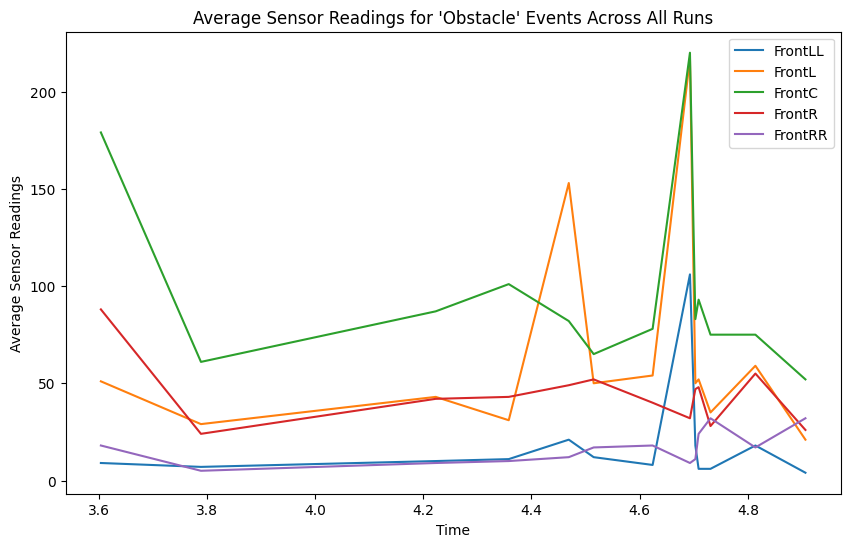

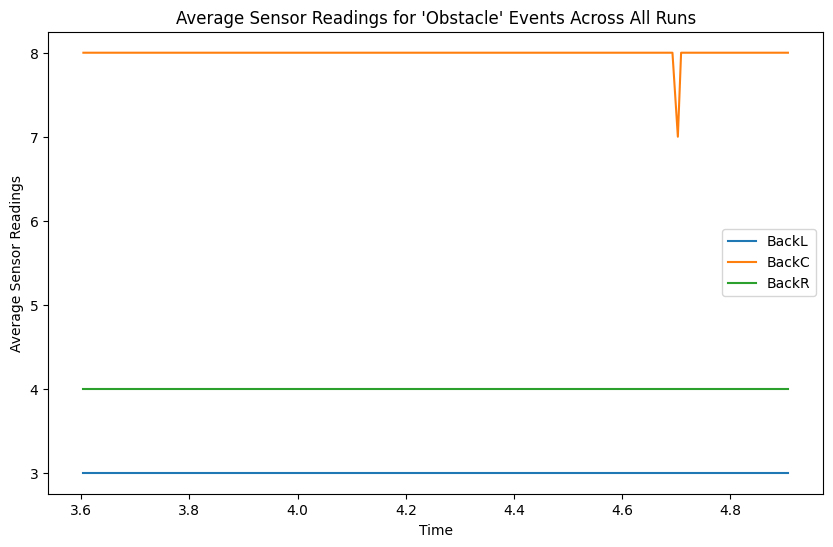

In [18]:
plot_avg_obstacle_readings(HW_all_data),
plot_avg_obstacle_readings(HW_all_data, FRONT_SENSORS),
plot_avg_obstacle_readings(HW_all_data, BACK_SENSORS)